In [1]:
import numpy as np
import matplotlib.pyplot as plt
import keras
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import Conv2D
from keras.layers import MaxPooling2D
from keras.constraints import max_norm, MinMaxNorm

Using TensorFlow backend.


In [3]:
def func1(x):
    return x**2*(np.abs(x)<=2) + 4*(np.abs(x)>2)

def func2(x):
    return - x**2*(np.abs(x)<=2) - 4*(np.abs(x)>2)
    
    
Xtest = np.arange(-5, 5, 0.1)
Ytest1 = func1(Xtest)
Ytest2 = func2(Xtest)

Xlearn = np.random.uniform(-5, 5, size=(200))
Ylearn1 = func1(Xlearn) + 0.1*np.random.normal(0,1,len(Xlearn))
Ylearn2 = func2(Xlearn) + 0.1*np.random.normal(0,1,len(Xlearn))

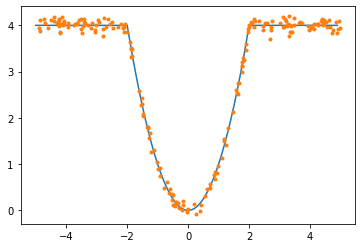

In [4]:
plt.plot(Xtest, Ytest1)
plt.plot(Xlearn, Ylearn1, '.', label='Raw input data with noise')
plt.show()

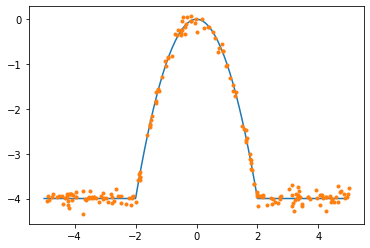

In [5]:
plt.plot(Xtest, Ytest2)
plt.plot(Xlearn, Ylearn2, '.', label='Raw input data with noise')
plt.show()

In [6]:
model1 = Sequential()
model1.add(Dense(8, input_dim=1, activation='relu'))
model1.add(Dense(128, activation='relu'))
model1.add(keras.layers.Dropout(0.2))
model1.add(Dense(128, activation='relu'))
model1.add(keras.layers.Dropout(0.2))
model1.add(Dense(1, activation='linear'))
model1.compile(optimizer='adam', loss='mse', metrics=['mse'])

In [7]:
nepoch = 100
nbatch = 10
model1.fit(Xlearn, Ylearn1, epochs=nepoch, batch_size=nbatch)

Epoch 1/100
200/200 [==============================] - 1s 5ms/step - loss: 7.6330 - mse: 7.6330
Epoch 2/100
200/200 [==============================] - 0s 235us/step - loss: 4.0905 - mse: 4.0905
Epoch 3/100
200/200 [==============================] - 0s 229us/step - loss: 1.5679 - mse: 1.5679
Epoch 4/100
200/200 [==============================] - 0s 264us/step - loss: 0.8025 - mse: 0.8025
Epoch 5/100
200/200 [==============================] - 0s 222us/step - loss: 0.8290 - mse: 0.8290
Epoch 6/100
200/200 [==============================] - 0s 298us/step - loss: 0.7351 - mse: 0.7351
Epoch 7/100
200/200 [==============================] - 0s 206us/step - loss: 0.7634 - mse: 0.7634
Epoch 8/100
200/200 [==============================] - 0s 217us/step - loss: 0.7419 - mse: 0.7419
Epoch 9/100
200/200 [==============================] - 0s 285us/step - loss: 0.6418 - mse: 0.6418
Epoch 10/100
200/200 [==============================] - 0s 210us/step - loss: 0.6371 - mse: 0.6371
Epoch 11/100
200/200 

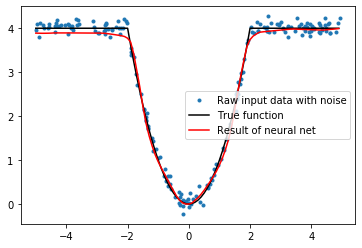

In [7]:
Ylearned1 = model1.predict(Xtest)

plt.plot(Xlearn, Ylearn1, '.', label='Raw input data with noise')
plt.plot(Xtest, Ytest1, label='True function', c='black')
plt.plot(Xtest, Ylearned1, label='Result of neural net', c='red')
plt.legend()

In [12]:
model2 = Sequential()
model2.add(Dense(8, input_dim=1, activation='relu'))
model2.add(Dense(128, activation='relu'))
model2.add(keras.layers.Dropout(0.2))
model2.add(Dense(128, activation='relu'))
model2.add(keras.layers.Dropout(0.2))
model2.add(Dense(1, activation='linear'))
model2.compile(optimizer='adam', loss='mse', metrics=['mse'])

In [13]:
nepoch = 100
nbatch = 10
model2.fit(Xlearn, Ylearn2, epochs=nepoch, batch_size=nbatch)

Epoch 1/100
200/200 [==============================] - 0s 1ms/step - loss: 6.6878 - mse: 6.6878
Epoch 2/100
200/200 [==============================] - 0s 234us/step - loss: 1.3014 - mse: 1.3014
Epoch 3/100
200/200 [==============================] - 0s 226us/step - loss: 0.8012 - mse: 0.8012
Epoch 4/100
200/200 [==============================] - 0s 232us/step - loss: 0.7705 - mse: 0.7705
Epoch 5/100
200/200 [==============================] - 0s 203us/step - loss: 0.7169 - mse: 0.7169
Epoch 6/100
200/200 [==============================] - 0s 223us/step - loss: 0.7600 - mse: 0.7600
Epoch 7/100
200/200 [==============================] - 0s 216us/step - loss: 0.6891 - mse: 0.6891
Epoch 8/100
200/200 [==============================] - 0s 223us/step - loss: 0.6697 - mse: 0.6697
Epoch 9/100
200/200 [==============================] - 0s 231us/step - loss: 0.6994 - mse: 0.6994
Epoch 10/100
200/200 [==============================] - 0s 192us/step - loss: 0.6903 - mse: 0.6903
Epoch 11/100
200/200 

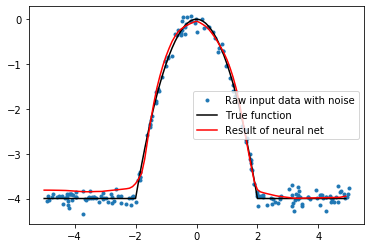

In [14]:
Ylearned2 = model2.predict(Xtest)

plt.plot(Xlearn, Ylearn2, '.', label='Raw input data with noise')
plt.plot(Xtest, Ytest2, label='True function', c='black')
plt.plot(Xtest, Ylearned2, label='Result of neural net', c='red')
plt.legend()

In [73]:
def func3(x):
    y = np.copy(x)
    y[np.where(x<0)] = -1
    y[np.where(x>0)] = 1
    return y
    
Xtest = np.arange(-5, 5, 0.1)
Ytest3 = func3(Xtest)

Xlearn = np.random.uniform(-5, 5, size=(200))
Ylearn3 = func3(Xlearn) + 0.1*np.random.normal(0,1,len(Xlearn))


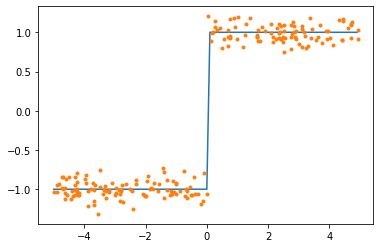

In [74]:
plt.plot(Xtest, Ytest3)
plt.plot(Xlearn, Ylearn3, '.', label='Raw input data with noise')
plt.show()

In [75]:
model3 = Sequential()
model3.add(Dense(8, input_dim=1, activation='relu'))
model3.add(Dense(128, activation='relu'))
model3.add(keras.layers.Dropout(0.2))
model3.add(Dense(128, activation='relu'))
model3.add(keras.layers.Dropout(0.2))
model3.add(Dense(1, activation='linear'))
model3.compile(optimizer='adam', loss='mse', metrics=['mse'])

In [76]:
nepoch = 100
nbatch = 10
model3.fit(Xlearn, Ylearn3, epochs=nepoch, batch_size=nbatch)

Epoch 1/100
200/200 [==============================] - 0s 2ms/step - loss: 0.4414 - mse: 0.4414
Epoch 2/100
200/200 [==============================] - 0s 472us/step - loss: 0.2411 - mse: 0.2411
Epoch 3/100
200/200 [==============================] - 0s 457us/step - loss: 0.2181 - mse: 0.2181
Epoch 4/100
200/200 [==============================] - 0s 427us/step - loss: 0.1800 - mse: 0.1800
Epoch 5/100
200/200 [==============================] - 0s 414us/step - loss: 0.1613 - mse: 0.1613
Epoch 6/100
200/200 [==============================] - 0s 416us/step - loss: 0.1307 - mse: 0.1307
Epoch 7/100
200/200 [==============================] - 0s 392us/step - loss: 0.1130 - mse: 0.1130
Epoch 8/100
200/200 [==============================] - 0s 398us/step - loss: 0.1021 - mse: 0.1021
Epoch 9/100
200/200 [==============================] - 0s 409us/step - loss: 0.0882 - mse: 0.0882
Epoch 10/100
200/200 [==============================] - 0s 336us/step - loss: 0.0658 - mse: 0.0658
Epoch 11/100
200/200 

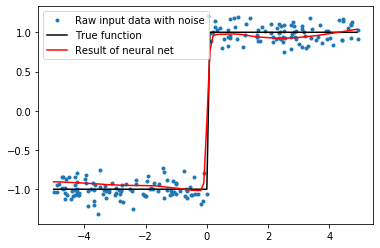

In [77]:
Ylearned3 = model3.predict(Xtest)

plt.plot(Xlearn, Ylearn3, '.', label='Raw input data with noise')
plt.plot(Xtest, Ytest3, label='True function', c='black')
plt.plot(Xtest, Ylearned3, label='Result of neural net', c='red')
plt.legend()

In [1]:
def func4(x):
    y = np.copy(x)
    y[np.where((x<-1))] = -1
    y[np.where((x>0) &(x<1))] = 0
    y[np.where(x>=1)] = 1
    return y
    
Xtest = np.arange(-5, 5, 0.1)
Ytest4 = func4(Xtest)

Xlearn = np.random.uniform(-5, 5, size=(200))
Ylearn4 = func4(Xlearn) + 0.1*np.random.normal(0,1,len(Xlearn))


NameError: name 'np' is not defined

In [2]:
plt.plot(Xtest, Ytest4)
plt.plot(Xlearn, Ylearn4, '.', label='Raw input data with noise')
plt.show()

NameError: name 'plt' is not defined

In [86]:
model4 = Sequential()
model4.add(Dense(8, input_dim=1, activation='relu'))
model4.add(Dense(128, activation='relu'))
model4.add(keras.layers.Dropout(0.2))
model4.add(Dense(128, activation='relu'))
model4.add(keras.layers.Dropout(0.2))
model4.add(Dense(1, activation='linear'))
model4.compile(optimizer='adam', loss='mse', metrics=['mse'])

In [87]:
nepoch = 200
nbatch = 20
model4.fit(Xlearn, Ylearn3, epochs=nepoch, batch_size=nbatch)

Epoch 1/200
200/200 [==============================] - 0s 2ms/step - loss: 0.8640 - mse: 0.8640
Epoch 2/200
200/200 [==============================] - 0s 242us/step - loss: 0.8904 - mse: 0.8904
Epoch 3/200
200/200 [==============================] - 0s 242us/step - loss: 0.8376 - mse: 0.8376
Epoch 4/200
200/200 [==============================] - 0s 204us/step - loss: 0.8534 - mse: 0.8534
Epoch 5/200
200/200 [==============================] - 0s 198us/step - loss: 0.8369 - mse: 0.8369
Epoch 6/200
200/200 [==============================] - 0s 230us/step - loss: 0.8613 - mse: 0.8613
Epoch 7/200
200/200 [==============================] - 0s 232us/step - loss: 0.8871 - mse: 0.8871
Epoch 8/200
200/200 [==============================] - 0s 564us/step - loss: 0.8210 - mse: 0.8210
Epoch 9/200
200/200 [==============================] - 0s 361us/step - loss: 0.8244 - mse: 0.8244
Epoch 10/200
200/200 [==============================] - 0s 387us/step - loss: 0.7943 - mse: 0.7943
Epoch 11/200
200/200 

200/200 [==============================] - 0s 212us/step - loss: 0.7967 - mse: 0.7967
Epoch 166/200
200/200 [==============================] - 0s 151us/step - loss: 0.7970 - mse: 0.7970
Epoch 167/200
200/200 [==============================] - 0s 176us/step - loss: 0.7961 - mse: 0.7961
Epoch 168/200
200/200 [==============================] - 0s 139us/step - loss: 0.7878 - mse: 0.7878
Epoch 169/200
200/200 [==============================] - 0s 160us/step - loss: 0.7995 - mse: 0.7995
Epoch 170/200
200/200 [==============================] - 0s 134us/step - loss: 0.8041 - mse: 0.8041
Epoch 171/200
200/200 [==============================] - 0s 128us/step - loss: 0.7936 - mse: 0.7936
Epoch 172/200
200/200 [==============================] - 0s 143us/step - loss: 0.7990 - mse: 0.7990
Epoch 173/200
200/200 [==============================] - 0s 162us/step - loss: 0.7993 - mse: 0.7993
Epoch 174/200
200/200 [==============================] - 0s 152us/step - loss: 0.7981 - mse: 0.7981
Epoch 175/200


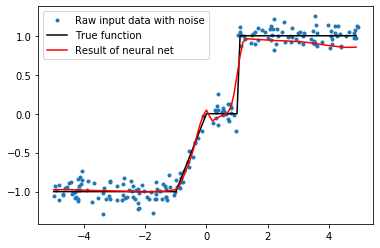

In [88]:
Ylearned4 = model4.predict(Xtest)

plt.plot(Xlearn, Ylearn4, '.', label='Raw input data with noise')
plt.plot(Xtest, Ytest3, label='True function', c='black')
plt.plot(Xtest, Ylearned3, label='Result of neural net', c='red')
plt.legend()